In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
employee_data = pd.read_csv(r"C:\Users\Jer_SMU\Desktop\SMU\IS630-G1-Statistical Thinking for Data Science\Assignment 1\Employee_Data (1).csv") 
employee_data.columns

Index(['Name', 'Salary', 'DOJ', 'Age', 'Gender', 'Dependents', 'HA', 'COLA',
       'CPF', 'Gross Salary', 'Insurance', 'Marital Status',
       'In Company Years', 'Year of Experience', 'Department', 'Position'],
      dtype='object')

Correlation between housing allowance and employee retention:

HA (Housing Allowance): Directly analyze the impact of housing allowance.

In Company Years: The number of years an employee has been with the company can indicate retention.

Salary: Evaluate whether housing allowance is significant for employees with different salary levels.

Department: Differences in housing allowance provisions across departments could affect retention.

In [3]:
clean_data = employee_data.dropna()
clean_data.describe()

,Salary,Age,Dependents,HA,COLA,CPF,Gross Salary,In Company Years,Year of Experience
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000
mean,93894.631631,40.250577,1.946016,7999.392495,22160.046881,13926.561421,110127.509586,9.905312,19.250577
std,33809.015964,11.321650,1.297603,2347.735266,7979.256809,5014.592733,37347.577343,8.771738,11.321650
min,15215.380000,21.000000,0.000000,3127.273000,3590.977762,2256.762931,22624.827875,0.000000,0.000000
25%,70148.855000,30.000000,1.000000,6233.578250,16555.812494,10404.560099,84834.524213,3.000000,9.000000
50%,96562.450000,40.000000,2.000000,7736.742000,22789.677983,14322.255358,110902.120759,7.000000,19.000000
75%,121215.482500,50.000000,3.000000,9535.249250,28608.033585,17978.821930,141209.346527,15.000000,29.000000
max,149991.340000,60.000000,4.000000,14640.034000,35399.416010,22246.890721,173050.731289,39.000000,39.000000


In [18]:
clean_data['Position'].unique ()

array(['Regional Marketing Manager', 'National Marketing Manager',
       'National Sales Manager', 'Accounts Intern', 'Software Engineer I',
       'Account Associate', 'National Account Head', 'QA Lead',
       'Account Director', 'HR Director', 'Technical Lead',
       'Senior Marketing Executive', 'Sales Director', 'HR Executive',
       'Marketing Intern', 'Regional Sales Manager', 'ERP Head',
       'Marketing Development Representative', 'Software Engineer II',
       'HR Representative', 'Recruitment Manager', 'Senior Executive',
       'Regional Account Head', 'Marketing Representative', 'Senior HR',
       'Marketing Director', 'IT Manager', 'QA Engineer II',
       'HR Associate', 'Account Executive', 'Senior Account Executive',
       'QA Engineer I', 'Sales Executive', 'HR Intern',
       'Marketing Associate', 'Software Engineer III',
       'Sales Representative', 'Business Development Representative',
       'Sales Development Representative', 'Account Representative'],

In [20]:
# Function to group positions
def group_position(position):
    if position in ['Accounts Intern', 'Marketing Intern', 'HR Intern', 'Software Engineer I', 
                    'QA Engineer I', 'Marketing Development Representative', 'Marketing Representative', 
                    'Sales Representative', 'Business Development Representative', 'Sales Development Representative', 
                    'Account Associate', 'HR Representative', 'HR Associate', 'Account Representative']:
        return 'Junior'
    elif position in ['Software Engineer II', 'QA Engineer II', 'Marketing Associate', 'HR Executive', 
                      'Senior Executive', 'Sales Executive', 'Account Executive', 'Senior Account Executive', 
                      'Technical Lead', 'Recruitment Manager', 'IT Manager', 'Regional Sales Manager', 
                      'Regional Account Head', 'Regional Marketing Manager', 'National Marketing Manager', 
                      'National Sales Manager', 'Senior Marketing Executive']:
        return 'Mid-level'
    else:
        return 'Senior'

# Apply the function using .loc[] to avoid the SettingWithCopyWarning
clean_data.loc[:, 'Position_Grouped'] = clean_data['Position'].apply(group_position)

In [4]:
dependents_sum = clean_data['Dependents'].value_counts().sort_index()

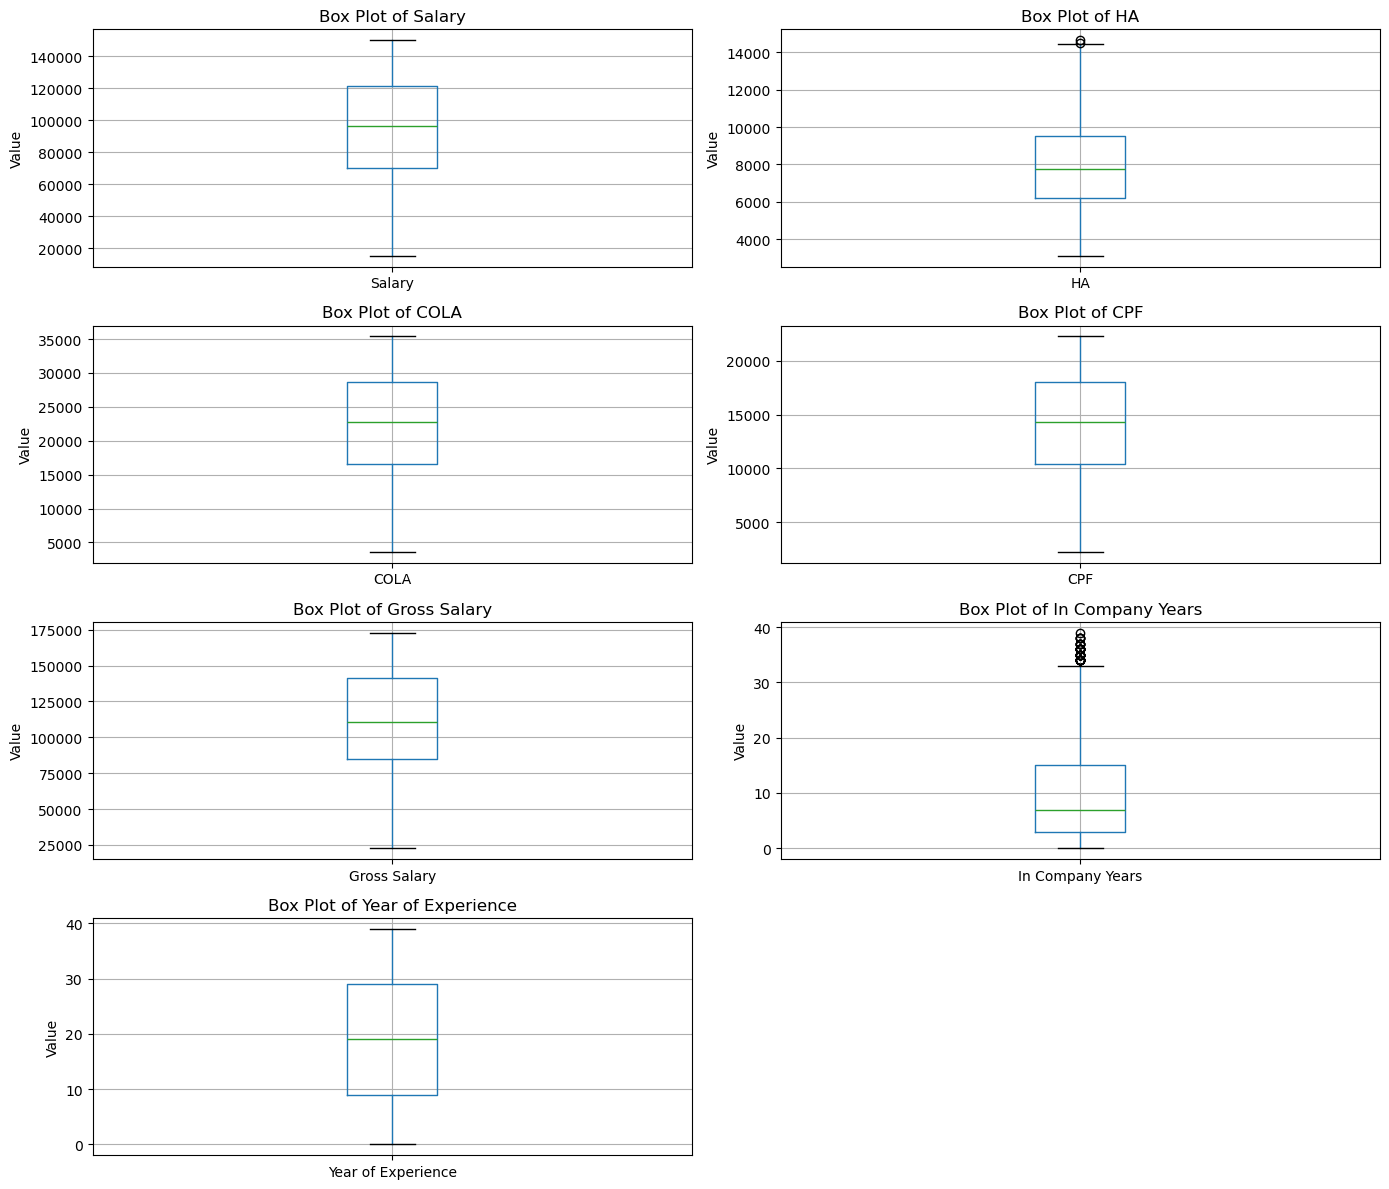

In [5]:
# Create figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 12))  # 4 rows, 2 columns (one extra subplot will remain empty)
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# List of columns for individual plots
columns = ['Salary', 'HA', 'COLA', 'CPF', 'Gross Salary', 'In Company Years', 'Year of Experience']

# Loop through each column and create individual box plots
for i, col in enumerate(columns):
    clean_data[[col]].boxplot(ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

# Remove the extra subplot (if any)
fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

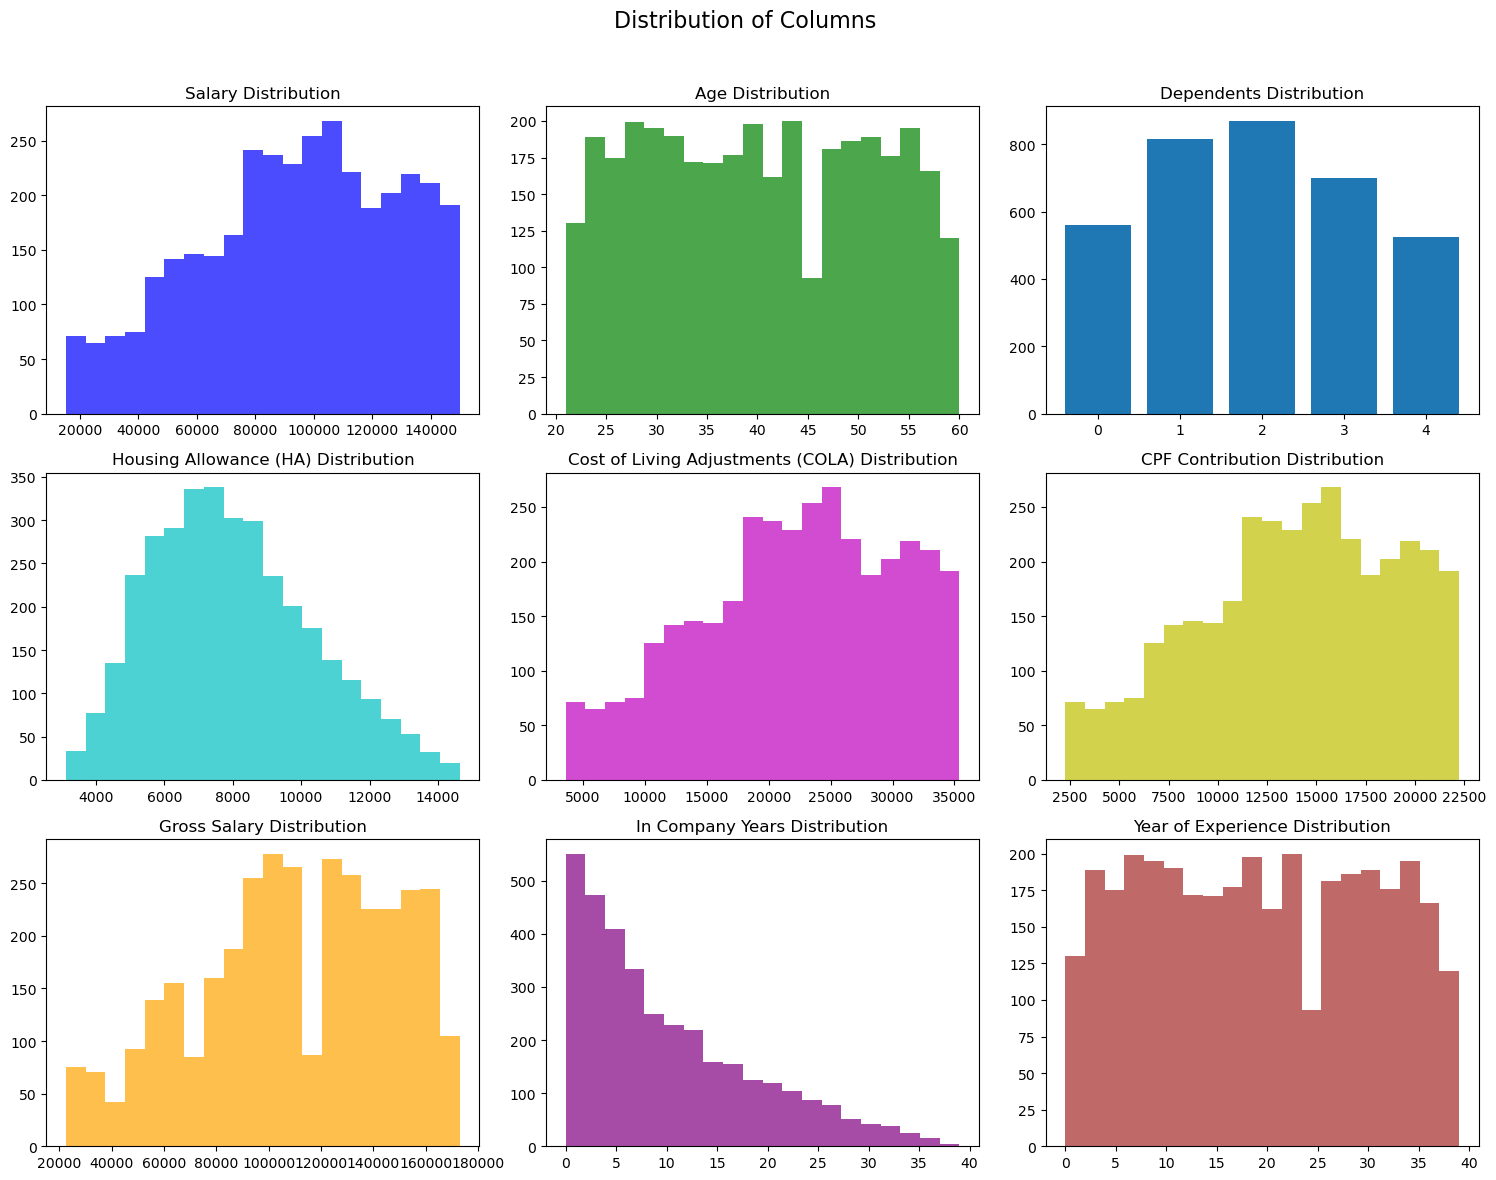

In [6]:
# Set up the matplotlib figure with subplots (3x3 grid)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Columns', fontsize=16)

# Plot each distribution
axes[0, 0].hist(clean_data['Salary'], bins=20, color='b', alpha=0.7)
axes[0, 0].set_title('Salary Distribution')

axes[0, 1].hist(clean_data['Age'], bins=20, color='g', alpha=0.7)
axes[0, 1].set_title('Age Distribution')

axes[0, 2].bar(dependents_sum.index, dependents_sum.values)
axes[0, 2].set_title('Dependents Distribution')

axes[1, 0].hist(clean_data['HA'], bins=20, color='c', alpha=0.7)
axes[1, 0].set_title('Housing Allowance (HA) Distribution')

axes[1, 1].hist(clean_data['COLA'], bins=20, color='m', alpha=0.7)
axes[1, 1].set_title('Cost of Living Adjustments (COLA) Distribution')

axes[1, 2].hist(clean_data['CPF'], bins=20, color='y', alpha=0.7)
axes[1, 2].set_title('CPF Contribution Distribution')

axes[2, 0].hist(clean_data['Gross Salary'], bins=20, color='orange', alpha=0.7)
axes[2, 0].set_title('Gross Salary Distribution')

axes[2, 1].hist(clean_data['In Company Years'], bins=20, color='purple', alpha=0.7)
axes[2, 1].set_title('In Company Years Distribution')

axes[2, 2].hist(clean_data['Year of Experience'], bins=20, color='brown', alpha=0.7)
axes[2, 2].set_title('Year of Experience Distribution')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Widening gap in total compensation: The gap between gross salary and base salary increases with higher income levels. This suggests that higher-paid employees not only earn more in base salary but also receive more in benefits such as housing allowances and COLA.



No direct link between dependents and salary: Although the distribution of dependents is concentrated around one to two dependents, there doesn't appear to be a direct correlation with salary distribution. This implies that the number of dependents (family responsibility) may not significantly impact employees' income levels.

Significant reliance on cost of living adjustments: The high proportion of employees receiving cost of living adjustments (COLA) suggests that COLA plays a crucial role in the overall compensation structure. It could indicate that many employees work in regions with varying living costs, and the company uses COLA to maintain equity in take-home pay.

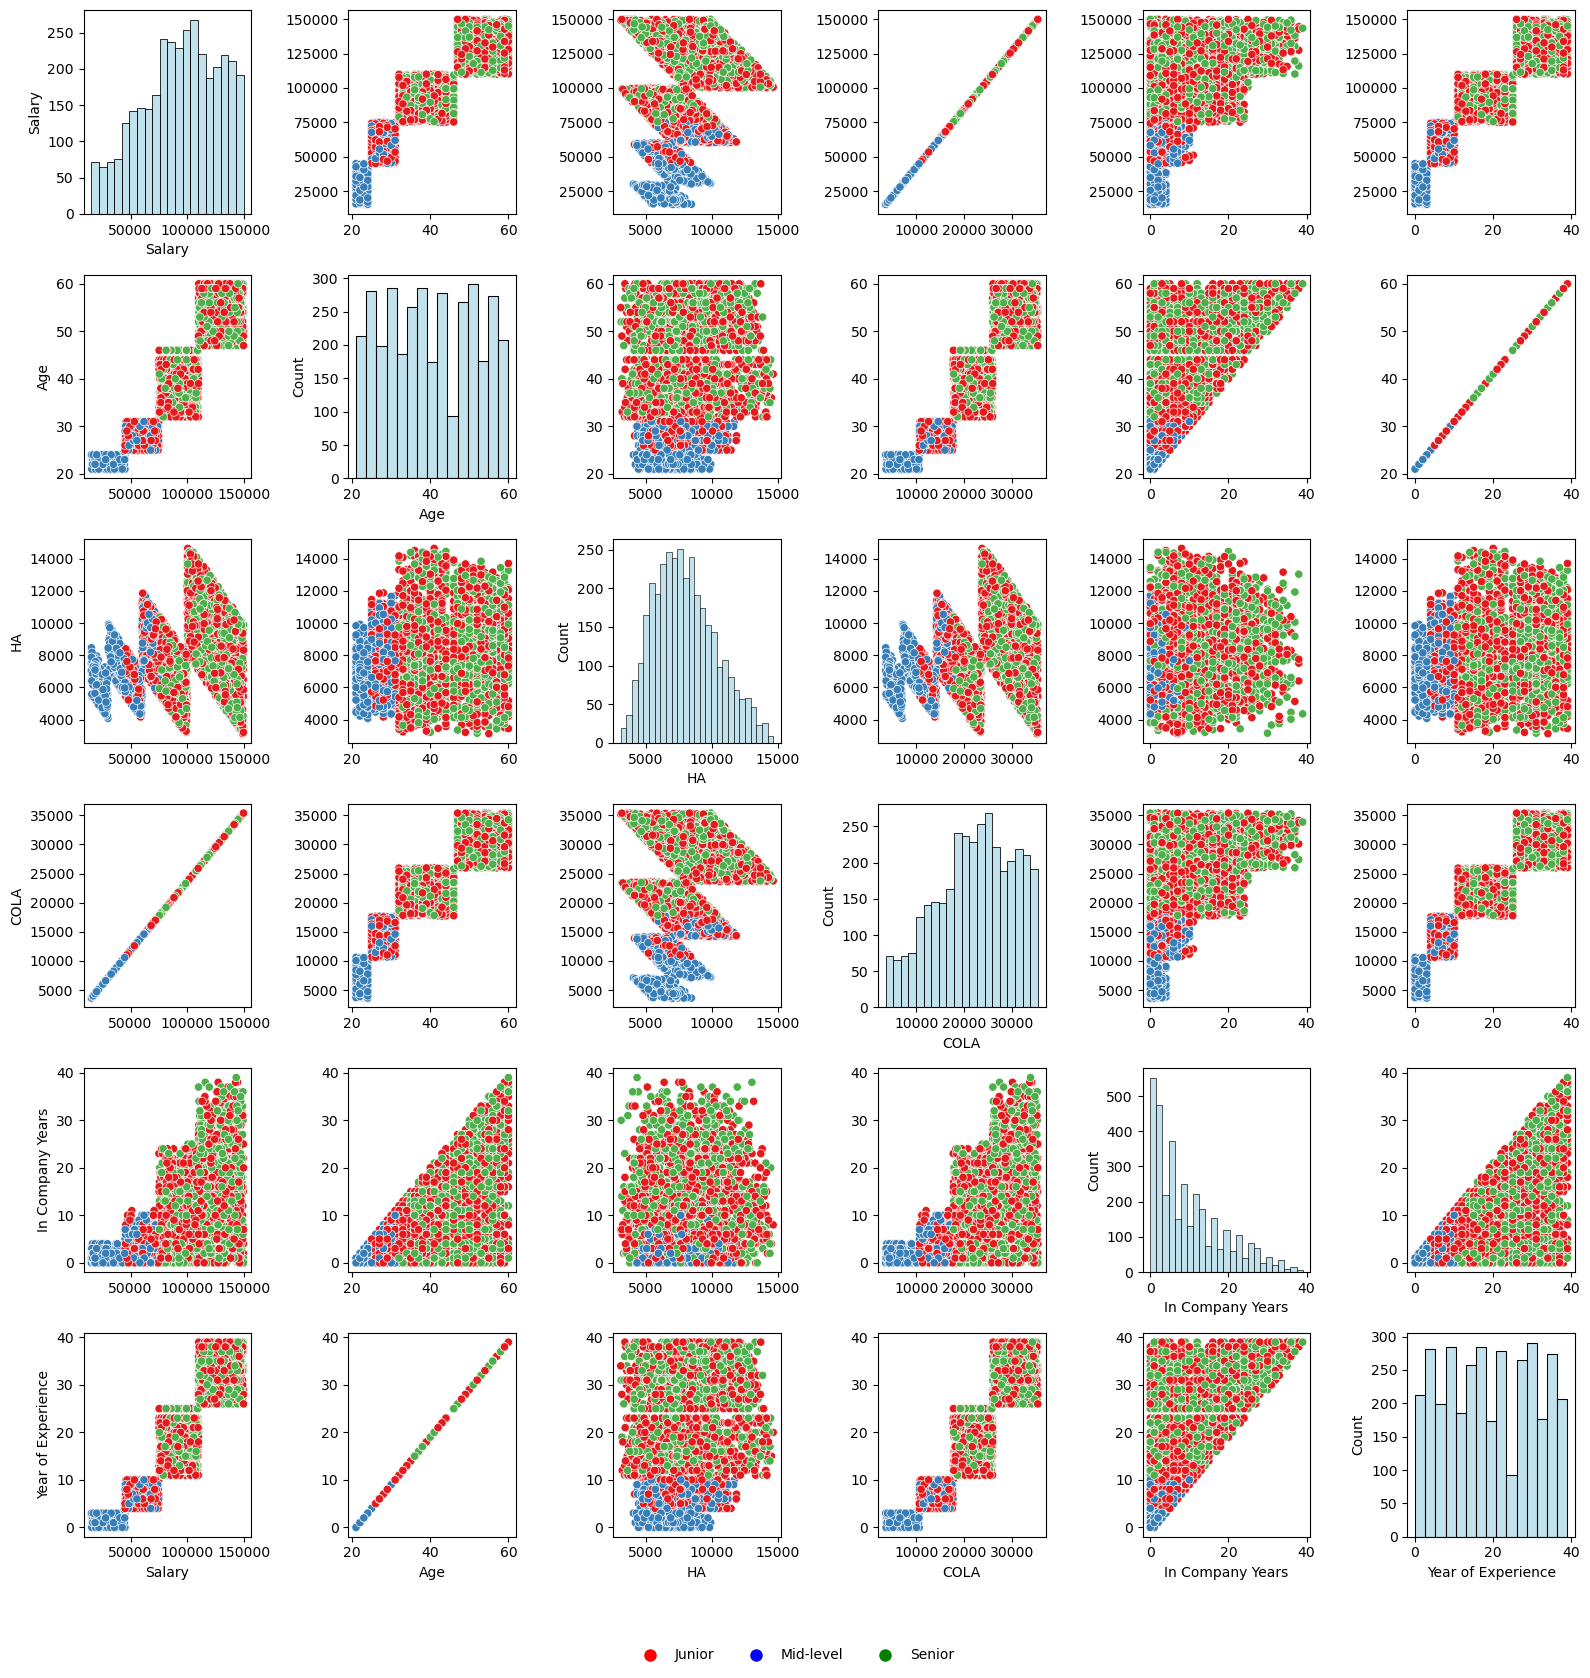

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Define plotting function
def myplotGrid(clean_data, label_column):
    '''
    Display a diagram showing relationships between features in clean_data with subplots
    ---
    inputs:
        clean_data: a pandas DataFrame containing features and label
        label_column: the name of the column in the DataFrame containing the labels (y)
    Return:
        None
    '''
    # Select relevant features for analysis
    selected_features = ['Salary', 'Age', 'HA', 'COLA', 'In Company Years', 'Year of Experience']
    X = clean_data[selected_features].values
    y = clean_data[label_column].values

    last_row = [len(selected_features) * (len(selected_features)-1) + i for i in range(1, len(selected_features) + 1)]
    first_col = [i * len(selected_features) for i in range(len(selected_features))]

    fig = plt.figure(figsize=(16, 16))
    colours = y
    n = 0

    l = len(selected_features)

    # iteratively access the data and create the respective plot
    for i in range(0, l):
        for j in range(0, l):
            
            # Generate a l by l grid of figures
            ax = fig.add_subplot(l, l, n + 1)
            
            # Display the axis name
            xlabels = selected_features[j]
            ylabels = selected_features[i]

            # Only display horizontal axis on last row
            if n+1 in last_row:
                ax.set_xlabel(xlabels)
            
            # Only display vertical axis on the first column
            if n in first_col:
                ax.set_ylabel(ylabels)
            
            # Plot histogram on the diagonal
            if i == j:
                sns.histplot(clean_data[selected_features[i]], kde=False, ax=ax, color="lightblue")
            # Plot scatter plot elsewhere
            else:
                sns.scatterplot(x=X[:, j], y=X[:, i], hue=colours, palette="Set1", ax=ax, legend=False)
                
            # Move to the next plot
            n = n+1
    
    # Create a custom legend at the bottom explaining the color categories
    handles = [Line2D([0], [0], marker='o', color='w', label='Junior', markerfacecolor='red', markersize=10),
               Line2D([0], [0], marker='o', color='w', label='Mid-level', markerfacecolor='blue', markersize=10),
               Line2D([0], [0], marker='o', color='w', label='Senior', markerfacecolor='green', markersize=10)]

    fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)
    
    plt.tight_layout()
    plt.show()

# Example usage (assuming clean_data is already defined and contains the Position_Grouped column)
myplotGrid(clean_data, 'Position_Grouped')


Age vs. Dependents:
-

The mean age of the employees is 40.25 years, and the mean number of dependents is 1.95. With a median age of 40 years and a median of 2 dependents, this suggests that a significant portion of the workforce is at a stage where family responsibilities are high. This could influence their need for higher compensation, benefits, or work-life balance arrangements. Exploring the relationship between employee age, dependents, and their satisfaction or turnover rates could provide insights into how benefits packages should be tailored to different life stages.

Gross Salary vs. In Company Years:
-
The mean gross salary is SGD110,127, with employees having been with the company for an average of almost 10 years. However, the variation in gross salary is quite large, ranging from SGD22,624 to SGD173,050. This raises questions about the progression of salary with tenure. Analyzing whether employees who stay longer with the company receive significant salary increases, or if there is a plateau after a certain number of years, could provide valuable insights into how well the company rewards loyalty.

Cost of Living Adjustments (COLA):
-
The mean COLA is GSD22,160, but with a standard deviation of RMB7,979, there seems to be significant variation in how this benefit is distributed. The highest COLA is $35,399, indicating that employees in higher-cost areas or with higher roles likely receive larger adjustments, potentially reflecting geographical or seniority-based COLA provisions.

Experience vs. Tenure:
-
The mean years of experience is 19.25 years, while the mean years in the company is just 9.9 years. This suggests that on average, employees have spent roughly half of their careers at this company, which might indicate decent employee retention rates, but the significant standard deviation for years in the company (8.77 years) shows that tenure varies widely.

In [8]:
def calculate_stats(df, *columns):
    stats = {
        'Mean': [df[col].mean() for col in columns],
        'Standard Deviation': [df[col].std() for col in columns],
        'Variance': [df[col].var() for col in columns]
    }
    
    # Convert the stats dictionary to a DataFrame for better readability
    stats_df = pd.DataFrame(stats, index=columns)
    return stats_df

In [9]:
calculate_stats(employee_data,'HA','Salary','In Company Years')

,Mean,Standard Deviation,Variance
HA,7999.620354,2330.275836,5.430185e+06
Salary,94292.524720,33983.208928,1.154858e+09
In Company Years,9.936522,8.818178,7.776027e+01


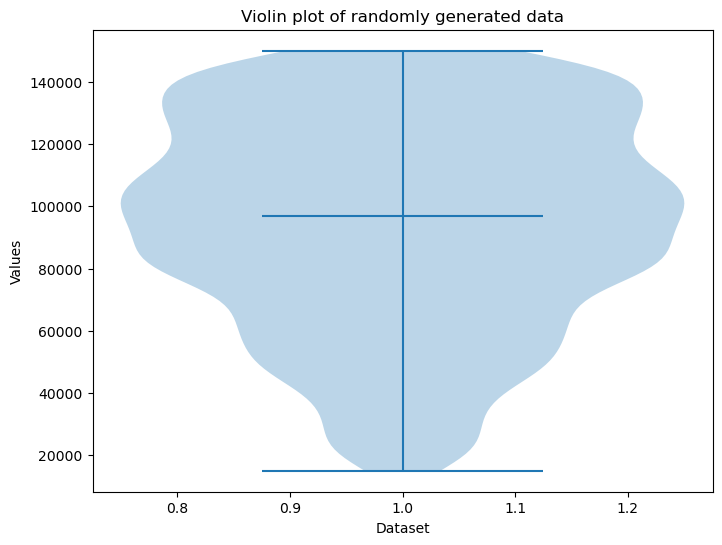

In [10]:
# Creating the violin plot
plt.figure(figsize=(8, 6))
plt.violinplot(employee_data['Salary'], showmeans=False, showmedians=True)

# Adding title and labels
plt.title('Violin plot of randomly generated data')
plt.xlabel('Dataset')
plt.ylabel('Values')

# Displaying the plot
plt.show()

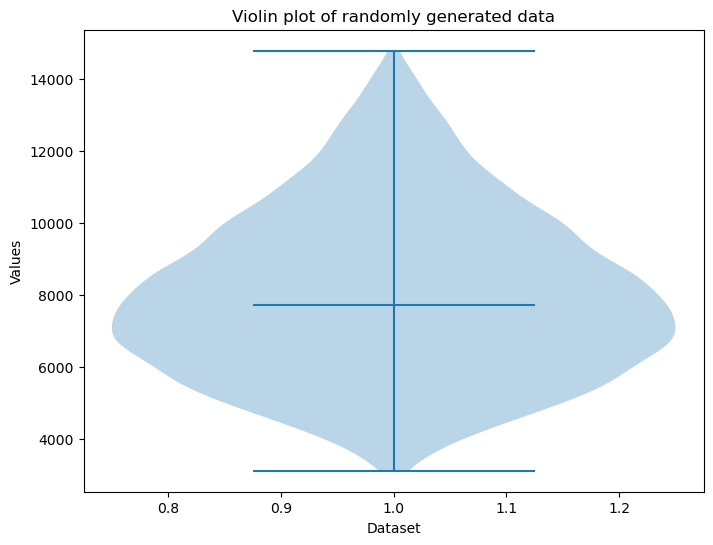

In [11]:
# Creating the violin plot
plt.figure(figsize=(8, 6))
plt.violinplot(employee_data['HA'], showmeans=False, showmedians=True)

# Adding title and labels
plt.title('Violin plot of randomly generated data')
plt.xlabel('Dataset')
plt.ylabel('Values')

# Displaying the plot
plt.show()

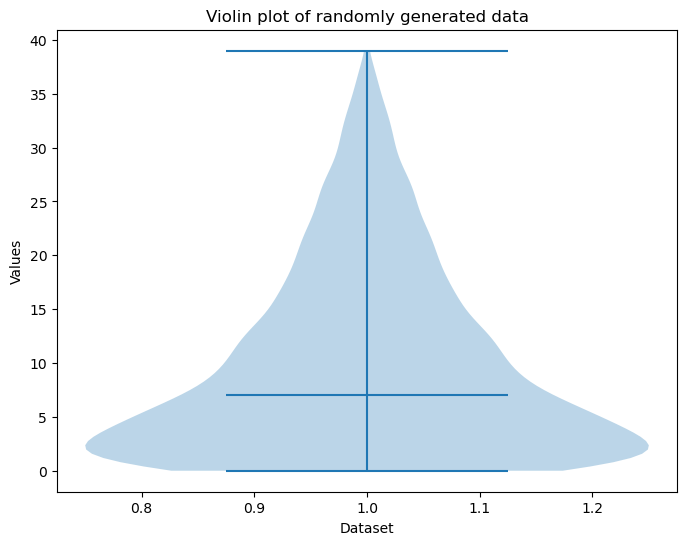

In [12]:
# Creating the violin plot
plt.figure(figsize=(8, 6))
plt.violinplot(employee_data['In Company Years'], showmeans=False, showmedians=True)

# Adding title and labels
plt.title('Violin plot of randomly generated data')
plt.xlabel('Dataset')
plt.ylabel('Values')

# Displaying the plot
plt.show()